# **DRUG CATEGORY PREDICTION**

## Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Loading the dataset

In [2]:
df = pd.read_csv('/content/drug200.csv')

In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [6]:
df.nunique()

,0
Age,57
Sex,2
BP,3
Cholesterol,2
Na_to_K,198
Drug,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


## Data Preprocessing

In [9]:
# checking for missing values
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [10]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [11]:
# Encode categorical features
label_encoders = {}

categorical_cols = ['Sex', 'BP', 'Cholesterol', 'Drug']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [16]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [12]:
# Defining features and target
X = df.drop('Drug', axis=1)
y = df['Drug']

In [14]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [15]:
y

,Drug
0,0
1,3
2,3
3,4
4,0
...,...
195,3
196,3
197,4
198,4


In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [18]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=500)
}


results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    print(f"----- {name} -----")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()

results_df = pd.DataFrame(results)

----- Decision Tree -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix:
 [[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]

----- Random Forest -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy          

In [19]:
print(results_df)

                 Model  Accuracy  Precision  Recall  F1-Score
0        Decision Tree     1.000   1.000000   1.000  1.000000
1        Random Forest     1.000   1.000000   1.000  1.000000
2                  SVM     0.975   0.976562   0.975  0.974014
3                  KNN     0.875   0.882738   0.875  0.871342
4  Logistic Regression     0.925   0.931696   0.925  0.925187


In [20]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,1.000,1.000000,1.000,1.000000
1,Random Forest,1.000,1.000000,1.000,1.000000
2,SVM,0.975,0.976562,0.975,0.974014
3,KNN,0.875,0.882738,0.875,0.871342
4,Logistic Regression,0.925,0.931696,0.925,0.925187


## Hyperprarameter Tuning

In [21]:
# GridSearchCV for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_rf.fit(X_train_scaled, y_train)

print("Best Parameters (GridSearchCV):", grid_search_rf.best_params_)
print("Best CV Score:", grid_search_rf.best_score_)

# Evaluate on test set
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Best Parameters (GridSearchCV): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.99375
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [22]:
## RandomisedSearchCV for SVM
from scipy.stats import uniform

param_dist_svm = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

random_search_svm = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_dist_svm,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search_svm.fit(X_train_scaled, y_train)

print("Best Parameters (RandomizedSearchCV):", random_search_svm.best_params_)
print("Best CV Score:", random_search_svm.best_score_)

# Evaluate on test set
best_svm = random_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Best Parameters (RandomizedSearchCV): {'C': np.float64(7.41993941811405), 'gamma': 'scale', 'kernel': 'linear'}
Best CV Score: 0.9625
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## Finding the best Model

In [23]:
# Sort by F1-Score in descending order
best_model_row = results_df.sort_values(by='F1-Score', ascending=False).iloc[0]

print("Best Performing Model:")
print(f"Model: {best_model_row['Model']}")
print(f"Accuracy: {best_model_row['Accuracy']:.4f}")
print(f"Precision: {best_model_row['Precision']:.4f}")
print(f"Recall: {best_model_row['Recall']:.4f}")
print(f"F1-Score: {best_model_row['F1-Score']:.4f}")


Best Performing Model:
Model: Decision Tree
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


## Visualize all model performance

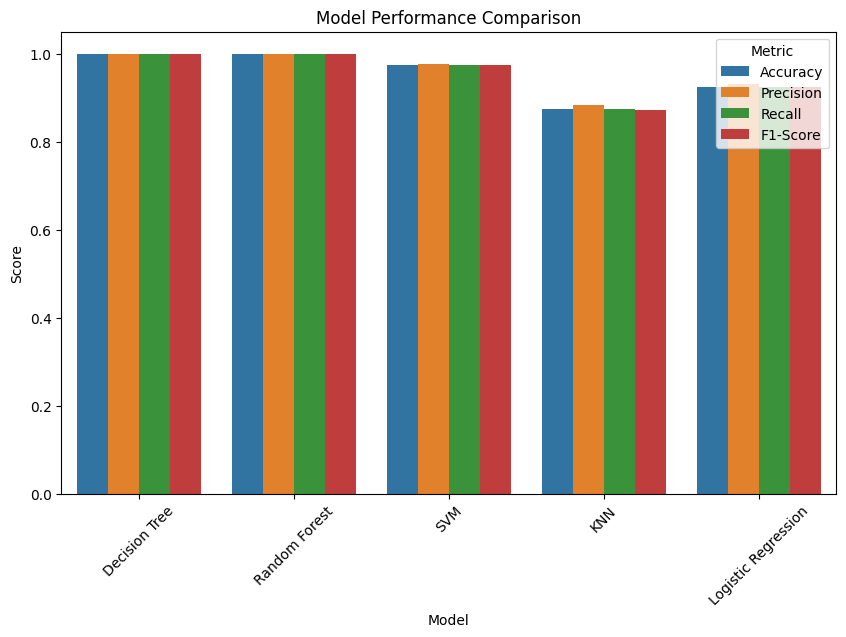

In [24]:
# Melting the DataFrame for better plotting
metrics_df = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()

# **THANK YOU**